# Transformações dos Dados

In [161]:
%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import plotly.express as px
import seaborn as sns
import import_ipynb
import services.lista_estados_regioes as ler
import services.visualization as view
import services.lista_estados_regioes as lesr

CPU times: total: 0 ns
Wall time: 0 ns


In [162]:
dataset = pd.read_csv('dados/dataset_poscomp.csv')

## Adicionar os eixos e somar de cada candidato

In [163]:
dataset['matematica'] = dataset.loc[:,['Matemática Discreta', 'Cálculo Diferencial e Integral', 'Álgebra Linear',
 'Geometria Analítica', 'Análise Combinatória', 'Probabilidade e Estatística', 'Lógica Matemática']].sum(axis=1)

In [164]:
dataset['fund_computacao'] = dataset.loc[:,['Organização de Arquivos e Dados','Técnicas de Programação',
 'Circuitos Digitais', 'Análise de Algoritmos', 'Teoria dos Grafos', 'Linguagens Formais, Autômatos e Computabilidade',
 'Algoritmos e Estruturas de Dados', 'Linguagens de Programação', 'Sistemas Operacionais', 'Arquitetura e Organização de Computadores']].sum(axis=1)

In [165]:
dataset['tec_computacao'] = dataset.loc[:,['Redes de Computadores', 'Computação Gráfica',
                                                   'Inteligência Artificial', 'Engenharia de Software', 'Sistemas Distribuídos',
                                                   'Compiladores', 'Processamento de Imagens', 'Banco de Dados']].sum(axis=1)

In [166]:
dataset['total'] = dataset['matematica'] + dataset['fund_computacao'] + dataset['tec_computacao']

In [167]:
dataset=dataset.drop_duplicates(subset='INSCRICAO', keep='first')
dataset['ANO'].value_counts()

ANO
2016    3528
2017    3327
2018    2952
2019    2458
Name: count, dtype: int64

In [168]:
cargo = {'1-Mestrado/Doutorado': '1', '2-Autoavaliação': '2'}
dataset = dataset.replace({'CARGO': cargo}, {'ESTADO': ler.estados_n})
dataset = dataset.rename(columns={'PRESENTE DIA1': 'PRESENTE'})

In [169]:
# dataset['ESTADO'] = dataset['ESTADO'].replace(ler.estados_n)
# dataset['SEXO'] = dataset['SEXO'].replace(['M','F'],[1,0])
dataset['CARGO'] = dataset['CARGO'].replace(['Mestrado/Doutorado','Autoavaliação'],[0,1])
# dataset['REGIAO'] = dataset['REGIAO'].replace(ler.siglas_n)

In [170]:
#Aqui estou adicionando as regioes dos estados brasileiros
for i in lesr.regioes_brasil_siglas:
    dataset.loc[dataset['ESTADO'].isin(lesr.regioes_brasil_siglas[i]), 'REGIAO'] = i

In [171]:
dados_poscomp = dataset.drop_duplicates(subset='INSCRICAO', keep='first')
dados_poscomp = dados_poscomp.set_index('INSCRICAO')

In [172]:
estados_brasileiros = {0: 'AC',
           1: 'AL',
           2: 'AM',
           3: 'AP',
           4: 'BA',
           5: 'CE',
           6: 'DF',
           7: 'ES',
           8: 'GO',
           9: 'MA',
           10: 'MG',
           11: 'MS',
           12: 'MT',
           13: 'PA',
           14: 'PB',
           15: 'PE',
           16: 'PI',
           17: 'PR',
           18: 'RJ',
           19: 'RN',
           20: 'RO',
           21: 'RR',
           22: 'RS',
           23: 'SC',
           24: 'SP',
           25: 'SE',
           26: 'TO'}

In [173]:
por_sexo_estado = dados_poscomp.groupby(['ESTADO', 'SEXO']).size().reset_index(name='candidatos')

por_sexo_estado['ESTADO'] = por_sexo_estado['ESTADO'].replace(estados_brasileiros)
por_sexo_estado['SEXO'] = por_sexo_estado['SEXO'].replace({0: 'Feminino', 1: 'Masculino'})

# por_sexo_estado

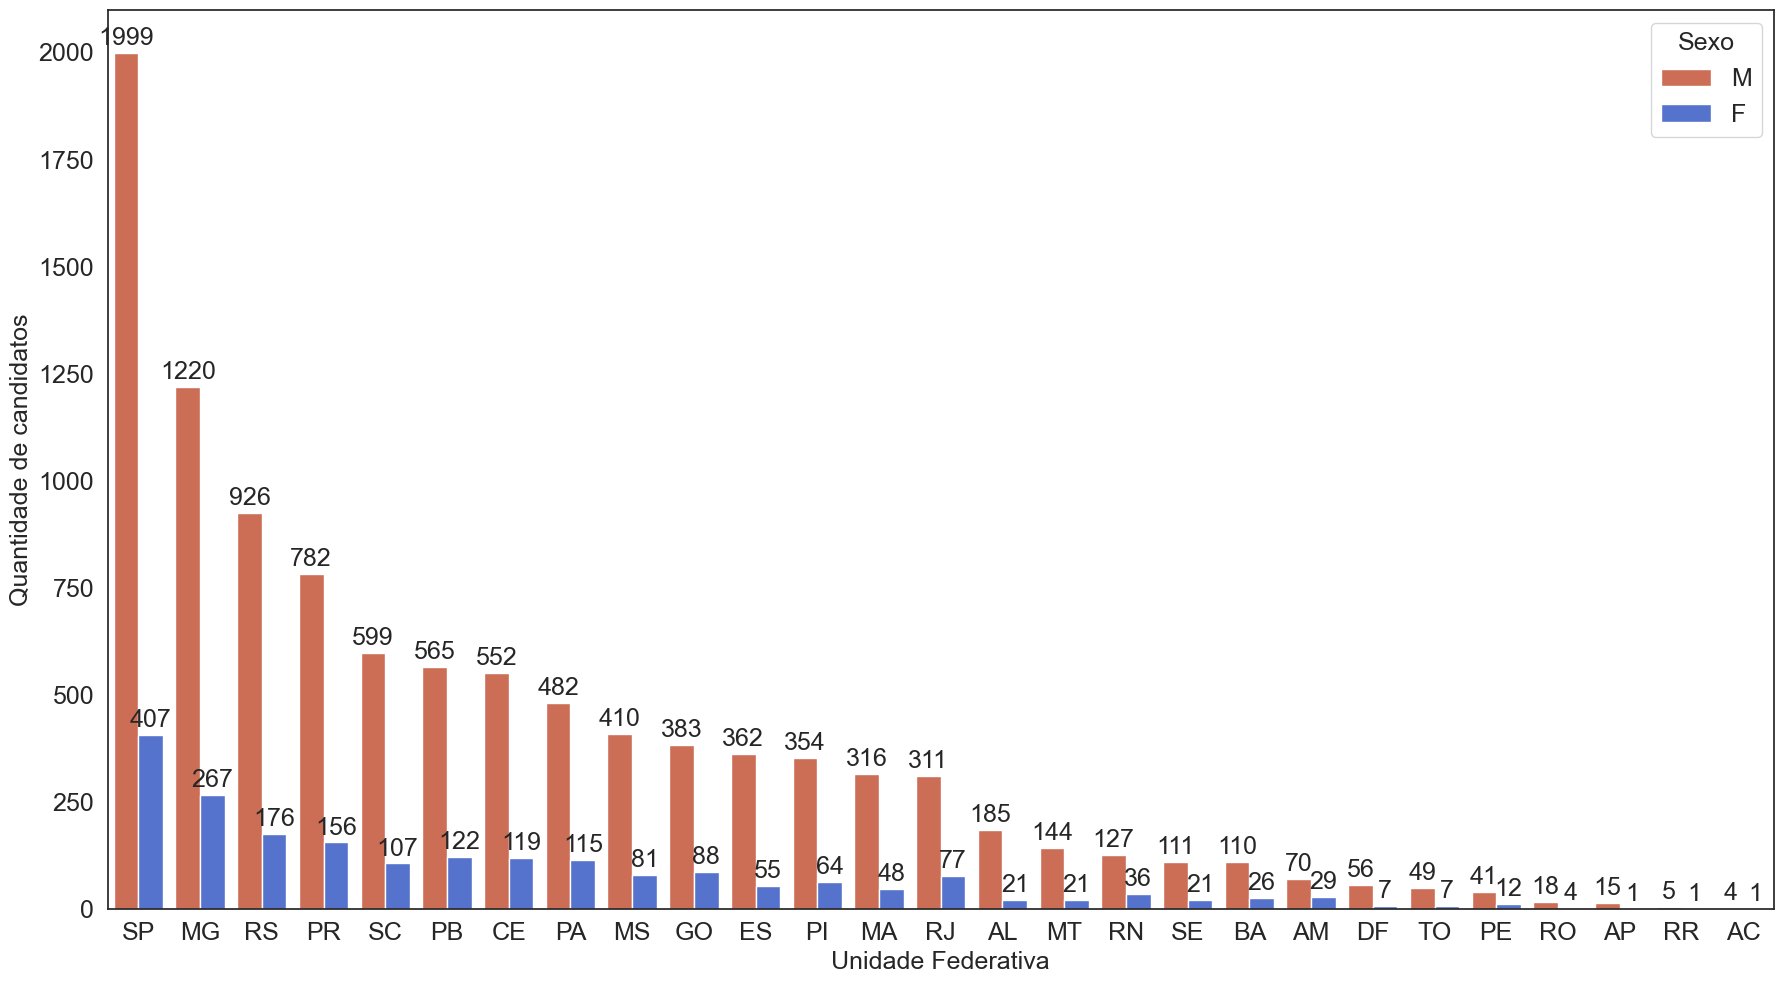

In [174]:
view.barplot_view(dataframe=por_sexo_estado.sort_values(['candidatos'], ascending=False),
                  y='candidatos',
                  x='ESTADO',
                  hue='SEXO',
                  fontsize=18,
                 figsize=(18,10), 
                 title_legend='Sexo',
                 xlabel='Unidade Federativa',
                 ylabel='Quantidade de candidatos')

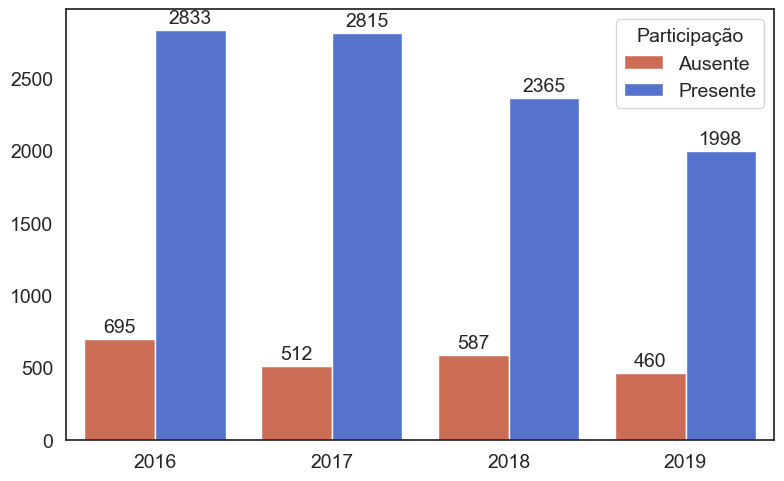

In [175]:
counts_presente = dados_poscomp.groupby(['PRESENTE', 'ANO']).size().reset_index(name='counts')

counts_presente['PRESENTE'] = counts_presente['PRESENTE'].replace({'N': 'Ausente', 'S': 'Presente'})

view.barplot_view(counts_presente, x='ANO', y='counts', hue='PRESENTE', 
                  title_legend='Participação')

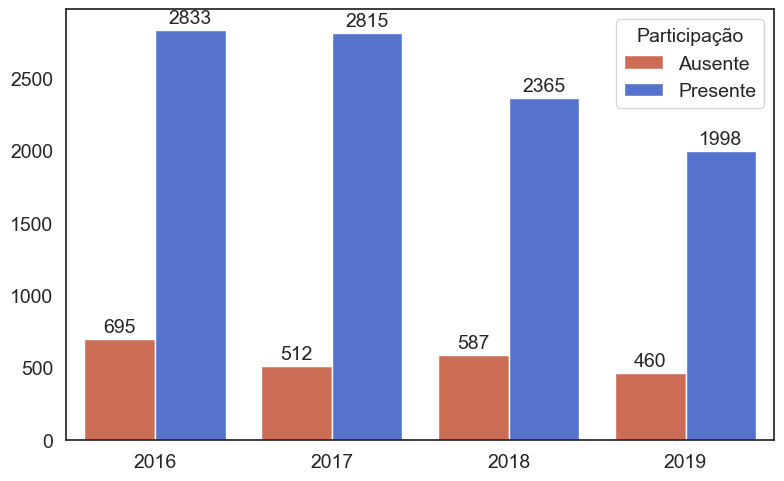

In [176]:
counts_presente = dados_poscomp.groupby(['PRESENTE', 'ANO']).size().reset_index(name='counts')

counts_presente['PRESENTE'] = counts_presente['PRESENTE'].replace({'N': 'Ausente', 'S': 'Presente'})

view.barplot_view(counts_presente, x='ANO', y='counts', hue='PRESENTE', title_legend='Participação')

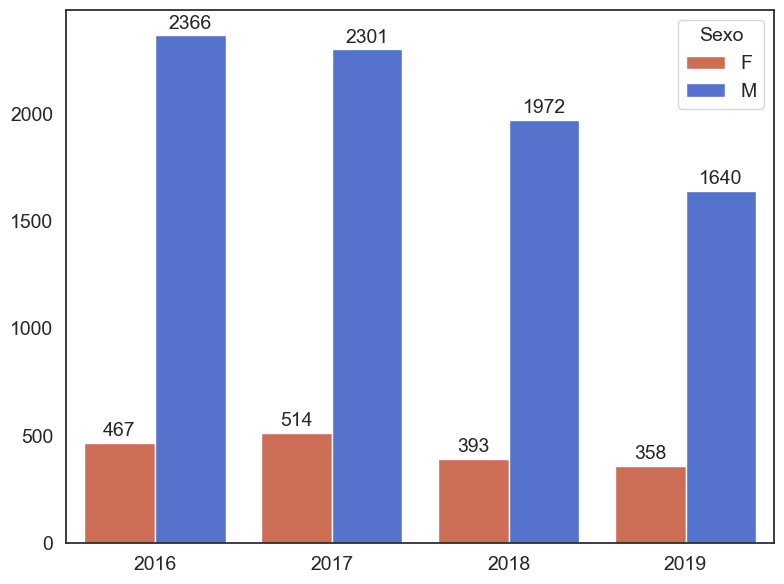

In [177]:
dados_presentes = dados_poscomp.query('PRESENTE == "S"')

counts_presente = dados_presentes.groupby(['SEXO', 'ANO']).size().reset_index(name='counts')

counts_presente['SEXO'] = counts_presente['SEXO'].replace({0: 'Feminino', 1: 'Masculino'})

view.barplot_view(counts_presente, x='ANO', y='counts', hue='SEXO', title_legend='Sexo', figsize=(8,6))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


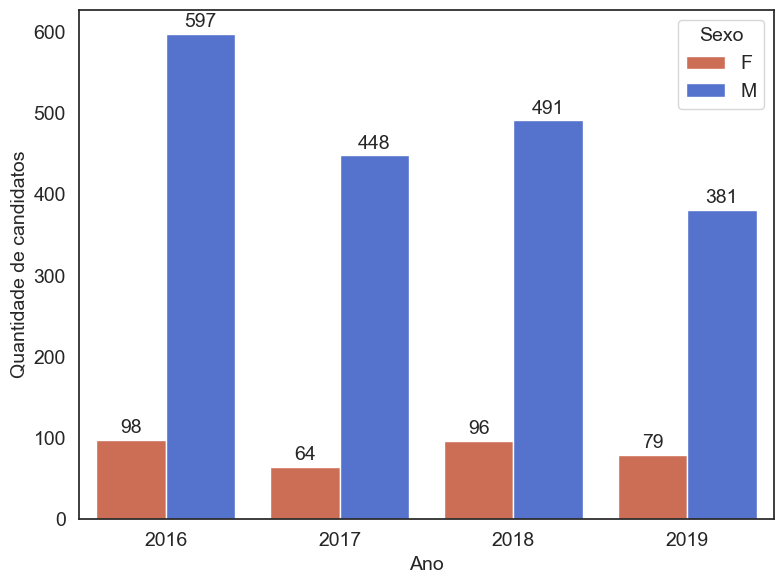

In [178]:
dados_faltantes = dados_poscomp.query('PRESENTE == "N"')

counts_faltantes = dados_faltantes.groupby(['SEXO', 'ANO']).size().reset_index(name='counts')

counts_faltantes['SEXO'] = counts_faltantes['SEXO'].replace({0: 'Feminino', 1: 'Masculino'})

view.barplot_view(counts_faltantes, x='ANO', y='counts', hue='SEXO', title_legend='Sexo', figsize=(8,6),
                 ylabel='Quantidade de candidatos', xlabel='Ano', save_path='imagens/grafico_porFaltantes.eps')

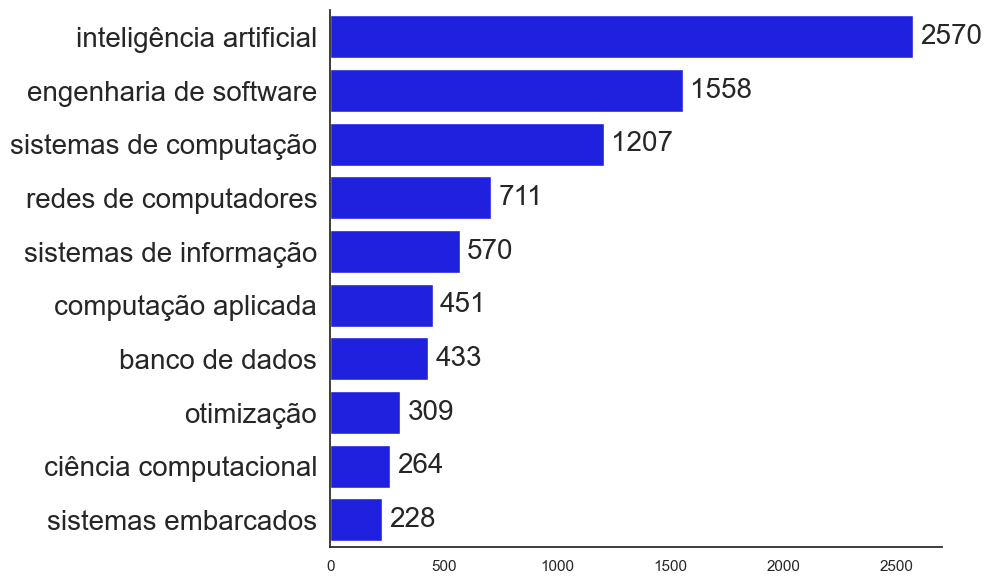

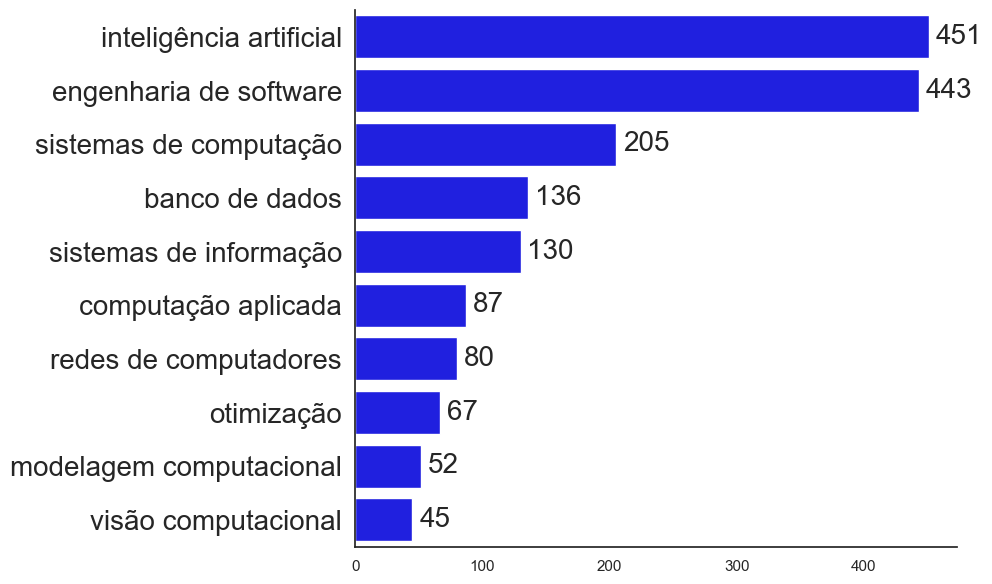

In [179]:
view.plot_top_especialidades_por_sexo(dados_poscomp, 'M', top_n=10, save_path='imagens/espec_masculino.eps')
view.plot_top_especialidades_por_sexo(dados_poscomp, 'F', top_n=10, save_path='imagens/espec_feminino.eps')

In [180]:
media_hist = dados_poscomp.query('PRESENTE == "S"')

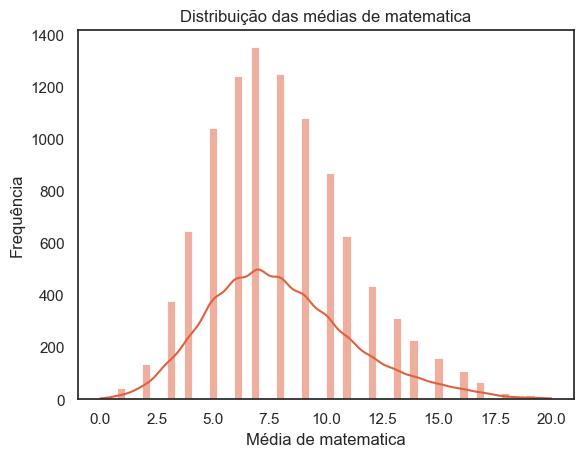

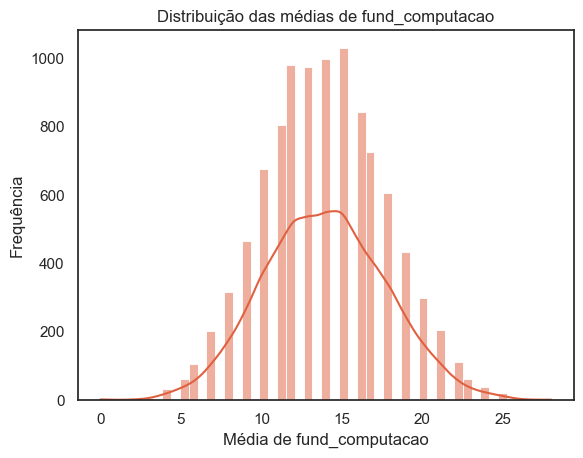

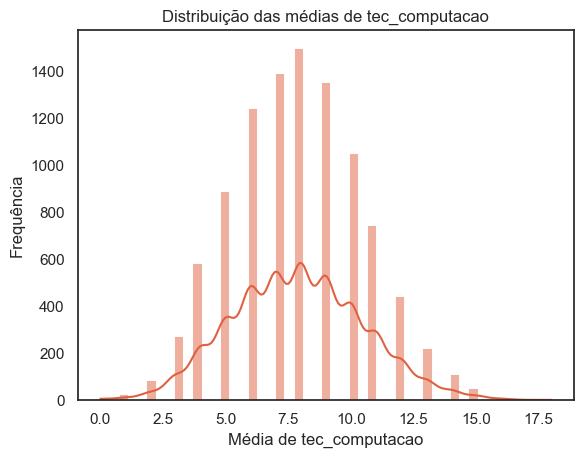

In [181]:
def plot_histogram(dataset, columns):
    for column in columns:
        sns.histplot(dataset[column], kde=True)
        plt.xlabel(f'Média de {column}')
        plt.ylabel('Frequência')
        plt.title(f'Distribuição das médias de {column}')
        plt.show()

columns = ['matematica', 'fund_computacao', 'tec_computacao']
plot_histogram(media_hist, columns)

In [182]:
dados_poscomp = dados_poscomp.query('PRESENTE != "N"')
dados_poscomp.shape

(10011, 40)

In [183]:
media = dados_poscomp['total'].mean()
desvio_padrao = dados_poscomp['total'].std()
variancia = dados_poscomp['total'].var()

In [184]:
print(f'Média: {media}, Desvio Padrão: {desvio_padrao}, Variância: {variancia}')

Média: 29.78493656977325, Desvio Padrão: 7.514926661036116, Variância: 56.47412272075142


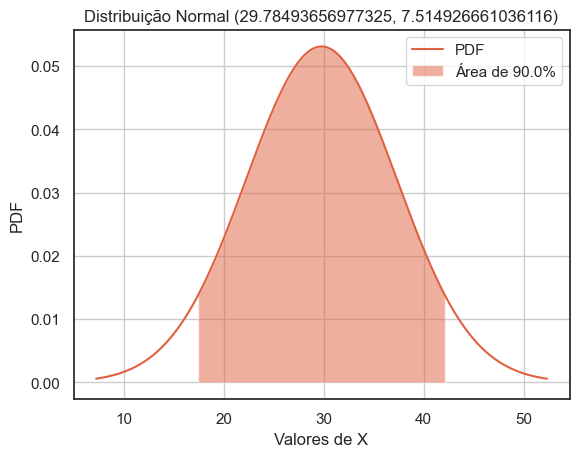

Intervalo de 90.0% de probabilidade: [17.42, 42.15]


In [185]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Probabilidade desejada
probabilidade = 0.90

# Encontre os valores de X correspondentes ao intervalo de probabilidade
limite_inferior, limite_superior = norm.interval(probabilidade, loc=media, scale=desvio_padrao)

# Valores para o gráfico
x = np.linspace(media - 3 * desvio_padrao, media + 3 * desvio_padrao, 1000)
pdf = norm.pdf(x, loc=media, scale=desvio_padrao)

# Plote o gráfico da PDF
plt.plot(x, pdf, label='PDF')
plt.fill_between(x, pdf, where=(x >= limite_inferior) & (x <= limite_superior), alpha=0.5, label=f'Área de {probabilidade*100}%')
plt.xlabel('Valores de X')
plt.ylabel('PDF')
plt.title(f'Distribuição Normal ({media}, {desvio_padrao})')

# Exiba o gráfico
plt.legend()
plt.grid(True)
plt.show()

# Exiba o intervalo de valores de X correspondentes à probabilidade
print(f'Intervalo de {probabilidade*100}% de probabilidade: [{limite_inferior:.2f}, {limite_superior:.2f}]')

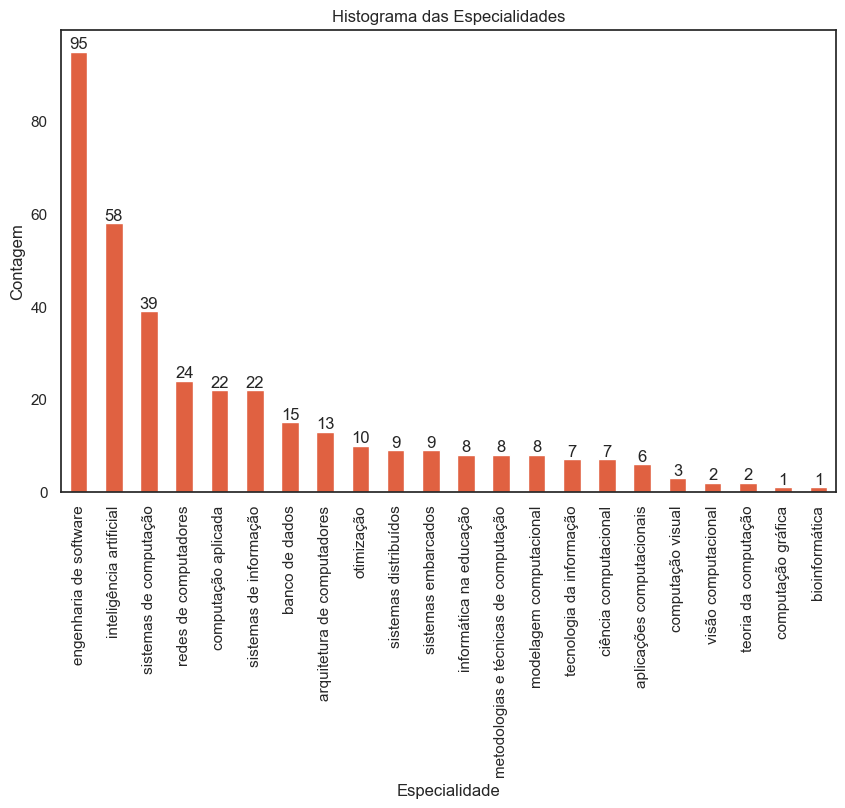

In [186]:
base = dados_poscomp[dados_poscomp['total'] <= 17]

plt.figure(figsize=(10, 6))
hist = base['ESPECIALIDADE'].value_counts().plot(kind='bar')

for i, v in enumerate(base['ESPECIALIDADE'].value_counts()):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.title('Histograma das Especialidades')
plt.xlabel('Especialidade')
plt.ylabel('Contagem')

plt.show()

In [187]:
base.shape

(369, 40)

In [188]:
base['ESPECIALIDADE'].value_counts()[:5]

ESPECIALIDADE
engenharia de software     95
inteligência artificial    58
sistemas de computação     39
redes de computadores      24
computação aplicada        22
Name: count, dtype: int64

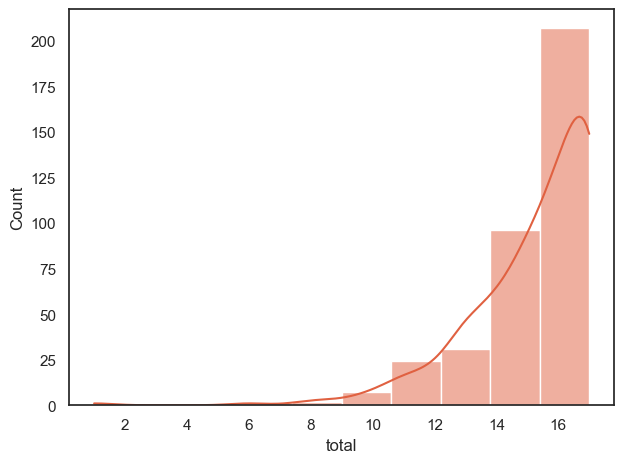

In [189]:
view.histplot(dataframe=base, x='total', kde=True, bins=10)

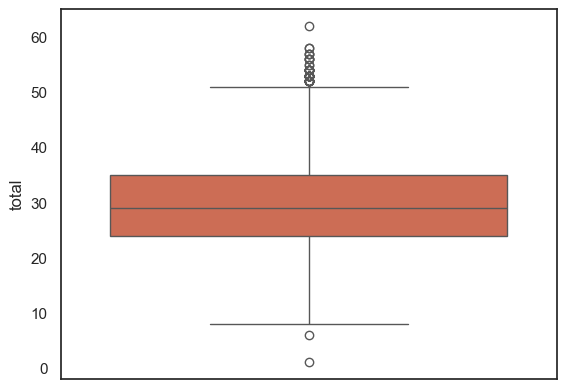

In [190]:
sns.boxplot(y=dados_poscomp["total"]);

#### Técnica para eliminar os outlier

In [191]:
df = dados_poscomp.copy()

In [192]:
def check_outlier(value, quantiles, amplitude):
    if (value < quantiles[0] - (1 * amplitude)) or (value > quantiles[2] + (1 * amplitude)):
        return True
    return False

In [193]:
# quartis das quantidades de caracteres dos títulos
import statistics

quantiles_title = statistics.quantiles(df["total"])
print("Quartis de nota:", quantiles_title)

# amplitude interquartil das quantidades de caracteres dos títulos

amplitude_title = quantiles_title[2] - quantiles_title[0]
print("Amplitude interquartil de nota:", amplitude_title)

# determinação dos outliers nos títulos

df["outlier_nota"] = df["total"].map(lambda x: check_outlier(
    value=x,
    quantiles=quantiles_title,
    amplitude=amplitude_title
))

Quartis de nota: [24.0, 29.0, 35.0]
Amplitude interquartil de nota: 11.0


In [194]:
df["outlier_nota"].value_counts()

outlier_nota
False    9782
True      229
Name: count, dtype: int64

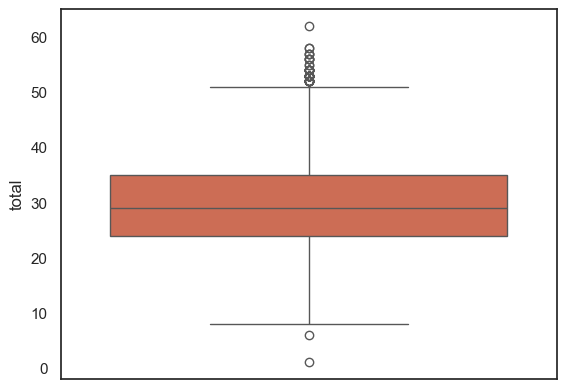

In [195]:
sns.boxplot(y=df["total"]);

In [196]:
df = df.loc[~((df["outlier_nota"]))]
df = df.iloc[:,:-1]
df.shape

(9782, 40)

In [197]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CARGO,9782.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Matemática Discreta,9782.0,1.206706,0.812189,0.0,1.0,1.0,2.0,3.0
Cálculo Diferencial e Integral,9782.0,1.080045,0.813213,0.0,1.0,1.0,2.0,3.0
Álgebra Linear,9782.0,1.270701,0.960586,0.0,1.0,1.0,2.0,3.0
Geometria Analítica,9782.0,1.009916,0.884845,0.0,0.0,1.0,2.0,3.0
Análise Combinatória,9782.0,1.173891,0.875154,0.0,1.0,1.0,2.0,3.0
Probabilidade e Estatística,9782.0,0.817011,0.688198,0.0,0.0,1.0,1.0,2.0
Lógica Matemática,9782.0,1.298610,0.861706,0.0,1.0,1.0,2.0,3.0
Organização de Arquivos e Dados,9782.0,0.750153,0.751060,0.0,0.0,1.0,1.0,3.0
Técnicas de Programação,9782.0,2.188305,0.713630,0.0,2.0,2.0,3.0,3.0


In [198]:
print(f'Perda - {(374 / 9849) * 100:.2f}% dos dados') # informação importante

Perda - 3.80% dos dados


In [200]:
nova_dados_poscomp = dados_poscomp[dados_poscomp['total'] >= 17]

In [202]:
nova_dados_poscomp = nova_dados_poscomp.drop(['NOME','PRESENTE','CARGO', 'ANO'], axis=1)

In [203]:
df = df.drop(['PRESENTE','CARGO', 'ANO'], axis=1)

In [204]:
nova_dados_poscomp.to_csv('dados/df_poscomp.csv', index=False)

## Verificar o comportamento dos candidatos de acordo com a linha de pesquisa

In [205]:
df.head()

,NOME,SEXO,ESTADO,ESPECIALIDADE,Matemática Discreta,Cálculo Diferencial e Integral,Álgebra Linear,Geometria Analítica,Análise Combinatória,Probabilidade e Estatística,...,Processamento de Imagens,Banco de Dados,IDADE,area_concentration,linhas_pesquisas,matematica,fund_computacao,tec_computacao,total,REGIAO
INSCRICAO,,,,,,,,,,,,,,,,,,,,,
39401645886-1,ABELARDO VIEIRA MOTA,M,CE,teoria da computação,3.0,3.0,2.0,0.0,1.0,2.0,...,1.0,1.0,27,informatica,engenharia de software,14.0,21.0,10.0,45.0,nordeste
39401651770-6,ABNER MOISES DOS SANTOS GOMES,M,SP,engenharia de software,0.0,1.0,1.0,1.0,0.0,0.0,...,2.0,1.0,25,informatica,engenharia de software,4.0,16.0,8.0,28.0,sudeste
39401671273-0,ABRAAO DA COSTA SANTANA,M,PA,sistemas de informação,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,30,informatica,engenharia de software,4.0,13.0,7.0,24.0,norte
39401684751-5,ADA RAQUEL DOS SANTOS CRUZ,F,AM,computação gráfica,0.0,0.0,2.0,2.0,1.0,0.0,...,1.0,1.0,19,computacao,visão computacional,6.0,15.0,11.0,32.0,norte
39401670049-5,ADAIR DA SILVA OLIVEIRA JUNIOR,M,MS,sistemas de computação,1.0,2.0,3.0,1.0,1.0,2.0,...,1.0,0.0,21,computacao,inteligência artificial,12.0,20.0,11.0,43.0,centro_oeste


In [206]:
nova_dados_poscomp['area_concentration'].value_counts()

area_concentration
computacao     5640
informatica    4126
Name: count, dtype: int64

In [207]:
nova_dados_poscomp['linhas_pesquisas'].value_counts()

linhas_pesquisas
inteligência artificial        4293
engenharia de software         2789
diversas                        945
redes de computadores           815
visão computacional             532
arquitetura de computadores     392
Name: count, dtype: int64

In [208]:
# plt.figure(figsize=(20, 15))
# plot = sns.lmplot(x="total", y="total", data=dados_poscomp, fit_reg=False, hue='linhas_pesquisas', legend=False)

# # Move the legend to an empty part of the plot
# plt.legend(loc='lower right')
# plt.show()